<a href="https://colab.research.google.com/github/distil-comedy/real-time-football-analysis/blob/main/football_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Install Dependencies
!pip install ultralytics roboflow supervision opencv-python pyyaml

import torch
print(f"✅ PyTorch: {torch.__version__}")
print(f"✅ CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
✅ PyTorch: 2.8.0+cu126
✅ CUDA available: True
✅ GPU: Tesla T4


In [2]:
# Cell 1: Explore Your Google Drive Structure
from google.colab import drive
import os

drive.mount('/content/drive')

# Let's see what's actually in your Drive
def explore_drive_structure():
    base_path = "/content/drive/MyDrive"

    print("🔍 Exploring your Google Drive structure...")
    print("=" * 50)

    # Check common folder names
    possible_folders = [
        "MYPROJECTS", "MyProjects", "myprojects",
        "football_analysis", "Football", "football"
    ]

    for folder in possible_folders:
        test_path = os.path.join(base_path, folder)
        if os.path.exists(test_path):
            print(f"✅ Found: {test_path}")
            # List contents
            contents = os.listdir(test_path)
            print(f"   Contents: {contents}")

            # Go deeper if it's the main project folder
            for item in contents:
                item_path = os.path.join(test_path, item)
                if os.path.isdir(item_path):
                    print(f"   📁 {item}/ → {os.listdir(item_path)[:5]}...")  # First 5 items
        else:
            print(f"❌ Not found: {test_path}")

explore_drive_structure()

Mounted at /content/drive
🔍 Exploring your Google Drive structure...
❌ Not found: /content/drive/MyDrive/MYPROJECTS
✅ Found: /content/drive/MyDrive/MyProjects
   Contents: ['extract_frames.py', 'labelimg_error.txt', 'football_analysis_dataset.zip', 'football_analysis_dataset', 'data', 'football_dataset']
   📁 football_analysis_dataset/ → ['data.yaml', 'train.txt', 'labels']...
   📁 data/ → ['videos', 'frames']...
   📁 football_dataset/ → ['yolov8n.pt', 'verify_dataset.py', 'analyze_dataset.py', 'train_baseline.py', 'test_baseline.py']...
❌ Not found: /content/drive/MyDrive/myprojects
❌ Not found: /content/drive/MyDrive/football_analysis
❌ Not found: /content/drive/MyDrive/Football
❌ Not found: /content/drive/MyDrive/football


In [3]:
# Cell 2: Search for Football-related Files
def find_football_files():
    base_path = "/content/drive/MyDrive"

    print("\n🔎 Searching for football-related files...")
    print("=" * 50)

    # Walk through entire Drive (with limit to avoid timeout)
    football_files = []
    for root, dirs, files in os.walk(base_path, topdown=True):
        # Check if this looks like your project
        if any(keyword in root.lower() for keyword in ['football', 'project', 'yolo', 'dataset']):
            print(f"📁 Potential project folder: {root}")
            print(f"   Files: {files[:10]}")  # First 10 files
            print(f"   Subdirs: {dirs[:10]}")  # First 10 subdirectories

        # Look for specific files
        for file in files:
            if any(keyword in file.lower() for keyword in ['football', 'yaml', 'yolo', 'train']):
                full_path = os.path.join(root, file)
                football_files.append(full_path)

        # Limit depth to avoid timeout
        if len(football_files) > 20:
            break

    print(f"\n🎯 Found {len(football_files)} football-related files:")
    for file in football_files[:10]:  # Show first 10
        print(f"   📄 {file}")

find_football_files()


🔎 Searching for football-related files...
📁 Potential project folder: /content/drive/MyDrive/MyProjects
   Files: ['extract_frames.py', 'labelimg_error.txt', 'football_analysis_dataset.zip']
   Subdirs: ['football_analysis_dataset', 'data', 'football_dataset']
📁 Potential project folder: /content/drive/MyDrive/MyProjects/football_analysis_dataset
   Files: ['data.yaml', 'train.txt']
   Subdirs: ['labels']
📁 Potential project folder: /content/drive/MyDrive/MyProjects/football_analysis_dataset/labels
   Files: []
   Subdirs: ['train']
📁 Potential project folder: /content/drive/MyDrive/MyProjects/football_analysis_dataset/labels/train
   Files: ['frame_05300.txt', 'frame_06550.txt', 'frame_03500.txt', 'frame_12500.txt', 'frame_08000.txt', 'frame_00350.txt', 'frame_10250.txt', 'frame_10700.txt', 'frame_08350.txt', 'frame_11950.txt']
   Subdirs: []
📁 Potential project folder: /content/drive/MyDrive/MyProjects/data
   Files: []
   Subdirs: ['videos', 'frames']
📁 Potential project folder: /c

In [4]:
# Cell 3: Copy Files Based on Actual Structure
def copy_correct_structure():
    """Copy files based on your actual Google Drive structure"""

    # UPDATE THESE PATHS based on what we found in previous cells
    actual_drive_path = "/content/drive/MyDrive/MyProjects"  # ⚠️ UPDATE THIS!

    if not os.path.exists(actual_drive_path):
        print(f"❌ Path not found: {actual_drive_path}")
        print("Please update the path above based on exploration results")
        return False

    print(f"📁 Found your project at: {actual_drive_path}")

    # Create Colab project structure
    colab_project = "/content/football_analysis"
    os.makedirs(colab_project, exist_ok=True)
    os.chdir(colab_project)

    # Map what to copy (these are common structures)
    copy_mappings = [
        # Source in Drive → Destination in Colab
        (f"{actual_drive_path}/football_dataset", f"{colab_project}/football_dataset"),
        (f"{actual_drive_path}/data", f"{colab_project}/data"),
        (f"{actual_drive_path}/videos", f"{colab_project}/videos"),
        (f"{actual_drive_path}/frames", f"{colab_project}/frames"),
    ]

    # Also try to find files directly in MYPROJECTS
    direct_files = [
        'football.yaml', 'extract_frames.py', 'analyze_dataset.py',
        'verify_dataset.py', 'yolov8n.pt'
    ]

    successful_copies = 0

    # Copy folder structures
    for source, destination in copy_mappings:
        if os.path.exists(source):
            # Use shutil.copytree with dirs_exist_ok for Python 3.8+
            import shutil
            if os.path.isdir(source):
                shutil.copytree(source, destination, dirs_exist_ok=True)
                print(f"✅ Copied folder: {source} → {destination}")
                successful_copies += 1

    # Copy individual files
    for file in direct_files:
        source_file = os.path.join(actual_drive_path, file)
        if os.path.exists(source_file):
            shutil.copy2(source_file, colab_project)
            print(f"✅ Copied file: {file}")
            successful_copies += 1

    # If nothing worked, try listing what's actually there
    if successful_copies == 0:
        print("\n🤔 Let's see what's actually in your MYPROJECTS folder:")
        all_items = os.listdir(actual_drive_path)
        for item in all_items:
            item_path = os.path.join(actual_drive_path, item)
            item_type = "📁 Folder" if os.path.isdir(item_path) else "📄 File"
            print(f"   {item_type}: {item}")

    return successful_copies > 0

# Run this after you've identified the correct path
copy_correct_structure()

📁 Found your project at: /content/drive/MyDrive/MyProjects
✅ Copied folder: /content/drive/MyDrive/MyProjects/football_dataset → /content/football_analysis/football_dataset
✅ Copied folder: /content/drive/MyDrive/MyProjects/data → /content/football_analysis/data
✅ Copied file: extract_frames.py


True

In [5]:
# Cell 4: Verify Dataset in Colab
import os
import yaml
from pathlib import Path

def verify_colab_dataset():
    print("🔍 Verifying dataset structure in Colab...")
    print("=" * 50)

    colab_project = "/content/football_analysis"
    dataset_path = f"{colab_project}/football_dataset"

    # Check if dataset exists
    if not os.path.exists(dataset_path):
        print("❌ football_dataset not found in Colab!")
        return False

    print(f"✅ football_dataset found at: {dataset_path}")

    # Check directory structure
    required_dirs = [
        "images/train",
        "images/val",
        "labels/train",
        "labels/val"
    ]

    all_good = True
    for dir_path in required_dirs:
        full_path = os.path.join(dataset_path, dir_path)
        if os.path.exists(full_path):
            file_count = len(os.listdir(full_path))
            print(f"✅ {dir_path}: {file_count} files")
        else:
            print(f"❌ Missing: {dir_path}")
            all_good = False

    # Check and update YAML file for Colab
    yaml_path = os.path.join(dataset_path, "football.yaml")
    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            config = yaml.safe_load(f)

        print(f"\n📊 Original YAML config:")
        print(f"   Path: {config.get('path', 'Not set')}")
        print(f"   Train: {config.get('train', 'Not set')}")
        print(f"   Val: {config.get('val', 'Not set')}")
        print(f"   Classes: {config.get('nc', 'Not set')}")

        # Update paths for Colab
        config['path'] = dataset_path
        config['train'] = 'images/train'
        config['val'] = 'images/val'

        with open(yaml_path, 'w') as f:
            yaml.dump(config, f)

        print(f"\n✅ Updated YAML config for Colab:")
        print(f"   Path: {config['path']}")
        print(f"   Train: {config['train']}")
        print(f"   Val: {config['val']}")

    else:
        print("❌ football.yaml not found!")
        all_good = False

    return all_good

# Run verification
if verify_colab_dataset():
    print("\n🎉 Dataset verification successful! Ready for training.")
else:
    print("\n❌ Dataset has issues that need to be fixed.")

🔍 Verifying dataset structure in Colab...
✅ football_dataset found at: /content/football_analysis/football_dataset
✅ images/train: 236 files
✅ images/val: 36 files
✅ labels/train: 236 files
✅ labels/val: 36 files

📊 Original YAML config:
   Path: E:/MyProjects/football_dataset
   Train: images/train
   Val: images/val
   Classes: 8

✅ Updated YAML config for Colab:
   Path: /content/football_analysis/football_dataset
   Train: images/train
   Val: images/val

🎉 Dataset verification successful! Ready for training.


In [6]:
# Cell 5: Analyze Dataset
def analyze_colab_dataset():
    import yaml
    from collections import Counter

    dataset_path = "/content/football_analysis/football_dataset"
    yaml_path = os.path.join(dataset_path, "football.yaml")

    with open(yaml_path, 'r') as f:
        config = yaml.safe_load(f)

    class_names = config['names']

    print("📊 Analyzing dataset distribution...")
    print("=" * 50)

    # Analyze training labels
    labels_path = os.path.join(dataset_path, "labels/train")
    class_counts = Counter()
    total_objects = 0

    if os.path.exists(labels_path):
        label_files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]
        print(f"Found {len(label_files)} label files")

        for label_file in label_files[:50]:  # Check first 50 files
            with open(os.path.join(labels_path, label_file), 'r') as f:
                for line in f:
                    if line.strip():
                        try:
                            class_id = int(line.split()[0])
                            class_counts[class_id] += 1
                            total_objects += 1
                        except ValueError:
                            continue

        print(f"\n📈 Class Distribution (from {total_objects} objects):")
        for class_id, count in class_counts.most_common():
            class_name = class_names.get(class_id, f"Unknown_{class_id}")
            percentage = (count / total_objects) * 100 if total_objects > 0 else 0
            print(f"   {class_name} (ID {class_id}): {count} objects ({percentage:.1f}%)")
    else:
        print("❌ Labels path not found")

analyze_colab_dataset()

📊 Analyzing dataset distribution...
Found 236 label files

📈 Class Distribution (from 1340 objects):
   player (ID 0): 976 objects (72.8%)
   penalty_spot (ID 6): 165 objects (12.3%)
   goalkeeper (ID 1): 94 objects (7.0%)
   referee (ID 2): 50 objects (3.7%)
   ball (ID 3): 20 objects (1.5%)
   center_circle (ID 7): 16 objects (1.2%)
   goal_post (ID 4): 12 objects (0.9%)
   corner_flag (ID 5): 7 objects (0.5%)


In [7]:
# Cell 6: Install Dependencies
!pip install ultralytics roboflow supervision opencv-python pyyaml

print("✅ All dependencies installed!")

✅ All dependencies installed!


In [8]:
# Cell 1: Diagnose Dataset Problems
import os
import cv2
import numpy as np
from pathlib import Path

def diagnose_dataset_issues():
    print("🔍 Diagnosing dataset issues...")
    print("=" * 50)

    dataset_path = "/content/football_analysis/football_dataset"

    # Check image files
    train_images_path = os.path.join(dataset_path, "images/train")
    val_images_path = os.path.join(dataset_path, "images/val")

    corrupt_images = []
    valid_images = []

    # Check training images
    if os.path.exists(train_images_path):
        print(f"📁 Checking {len(os.listdir(train_images_path))} training images...")
        for img_file in os.listdir(train_images_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(train_images_path, img_file)
                try:
                    img = cv2.imread(img_path)
                    if img is not None and img.size > 0:
                        valid_images.append(img_path)
                    else:
                        corrupt_images.append(img_path)
                except Exception as e:
                    corrupt_images.append(img_path)

    print(f"✅ Valid images: {len(valid_images)}")
    print(f"❌ Corrupt images: {len(corrupt_images)}")

    if corrupt_images:
        print("\n🚨 Corrupt images found:")
        for corrupt in corrupt_images[:10]:  # Show first 10
            print(f"   {os.path.basename(corrupt)}")

    # Check label files
    train_labels_path = os.path.join(dataset_path, "labels/train")
    if os.path.exists(train_labels_path):
        print(f"\n📝 Checking {len(os.listdir(train_labels_path))} label files...")

        valid_labels = 0
        invalid_labels = 0

        for label_file in os.listdir(train_labels_path):
            if label_file.endswith('.txt'):
                label_path = os.path.join(train_labels_path, label_file)
                try:
                    with open(label_path, 'r') as f:
                        content = f.read().strip()
                        if content:  # Check if file has content
                            # Validate YOLO format
                            lines = content.split('\n')
                            valid_format = True
                            for line in lines:
                                parts = line.strip().split()
                                if len(parts) != 5:
                                    valid_format = False
                                    break
                                # Check if values are valid
                                try:
                                    class_id = int(parts[0])
                                    x_center = float(parts[1])
                                    y_center = float(parts[2])
                                    width = float(parts[3])
                                    height = float(parts[4])

                                    if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and
                                            0 <= width <= 1 and 0 <= height <= 1):
                                        valid_format = False
                                        break
                                except ValueError:
                                    valid_format = False
                                    break

                            if valid_format:
                                valid_labels += 1
                            else:
                                invalid_labels += 1
                        else:
                            invalid_labels += 1
                except Exception as e:
                    invalid_labels += 1

        print(f"✅ Valid label files: {valid_labels}")
        print(f"❌ Invalid label files: {invalid_labels}")

    return valid_images, corrupt_images

valid_imgs, corrupt_imgs = diagnose_dataset_issues()

🔍 Diagnosing dataset issues...
📁 Checking 236 training images...
✅ Valid images: 236
❌ Corrupt images: 0

📝 Checking 236 label files...
✅ Valid label files: 0
❌ Invalid label files: 236


In [9]:
# Cell 2: Analyze Label Format Problems
def analyze_label_problems():
    print("🔍 Analyzing label format problems...")
    print("=" * 50)

    dataset_path = "/content/football_analysis/football_dataset"
    train_labels_path = os.path.join(dataset_path, "labels/train")

    if not os.path.exists(train_labels_path):
        print("❌ Labels path not found!")
        return

    problem_types = {
        'empty_files': 0,
        'wrong_columns': 0,
        'invalid_numbers': 0,
        'out_of_bounds': 0,
        'other_issues': 0
    }

    print("📋 Sample of problematic labels:")
    print("-" * 50)

    sample_count = 0
    for label_file in os.listdir(train_labels_path)[:10]:  # Check first 10 files
        if label_file.endswith('.txt'):
            label_path = os.path.join(train_labels_path, label_file)

            try:
                with open(label_path, 'r') as f:
                    content = f.read().strip()

                if not content:
                    problem_types['empty_files'] += 1
                    if sample_count < 3:
                        print(f"📄 {label_file}: EMPTY FILE")
                        sample_count += 1
                    continue

                lines = content.split('\n')
                for i, line in enumerate(lines):
                    line = line.strip()
                    if not line:
                        continue

                    parts = line.split()

                    # Check number of columns
                    if len(parts) != 5:
                        problem_types['wrong_columns'] += 1
                        if sample_count < 3:
                            print(f"📄 {label_file} line {i+1}: WRONG COLUMNS ({len(parts)} instead of 5)")
                            print(f"   Content: {line}")
                            sample_count += 1
                        break

                    # Check if values are numbers
                    try:
                        class_id = int(parts[0])
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])
                    except ValueError:
                        problem_types['invalid_numbers'] += 1
                        if sample_count < 3:
                            print(f"📄 {label_file} line {i+1}: INVALID NUMBERS")
                            print(f"   Content: {line}")
                            sample_count += 1
                        break

                    # Check if values are within bounds
                    if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
                        problem_types['out_of_bounds'] += 1
                        if sample_count < 3:
                            print(f"📄 {label_file} line {i+1}: VALUES OUT OF BOUNDS (0-1)")
                            print(f"   Values: {x_center}, {y_center}, {width}, {height}")
                            sample_count += 1
                        break

            except Exception as e:
                problem_types['other_issues'] += 1
                if sample_count < 3:
                    print(f"📄 {label_file}: OTHER ERROR - {e}")
                    sample_count += 1

    print("\n📊 Problem Summary:")
    print("=" * 50)
    for problem, count in problem_types.items():
        print(f"   {problem}: {count} files")

    return problem_types

problem_types = analyze_label_problems()

🔍 Analyzing label format problems...
📋 Sample of problematic labels:
--------------------------------------------------
📄 frame_11500.txt line 3: WRONG COLUMNS (6 instead of 5)
   Content: 2 0.559596 0.306824 0.008203 0.013611 0
📄 frame_02100.txt line 1: WRONG COLUMNS (6 instead of 5)
   Content: 2 0.419596 0.439106 0.011016 0.019676 0
📄 frame_10550.txt line 2: WRONG COLUMNS (6 instead of 5)
   Content: 2 0.520521 0.507972 0.021354 0.026278 0

📊 Problem Summary:
   empty_files: 0 files
   wrong_columns: 10 files
   invalid_numbers: 0 files
   out_of_bounds: 0 files
   other_issues: 0 files


In [10]:
# Cell 3 FIXED: Remove the 6th Column from Labels
def fix_extra_columns():
    print("🛠️ Fixing extra columns in labels...")
    print("=" * 50)

    dataset_path = "/content/football_analysis/football_dataset"
    train_labels_path = os.path.join(dataset_path, "labels/train")
    val_labels_path = os.path.join(dataset_path, "labels/val")

    fixed_count = 0

    def fix_labels_in_folder(labels_folder, folder_name):
        nonlocal fixed_count
        if not os.path.exists(labels_folder):
            print(f"❌ {folder_name} labels path not found!")
            return

        for label_file in os.listdir(labels_folder):
            if not label_file.endswith('.txt'):
                continue

            label_path = os.path.join(labels_folder, label_file)

            try:
                with open(label_path, 'r') as f:
                    content = f.read().strip()

                if not content:
                    continue

                lines = content.split('\n')
                fixed_lines = []

                for line in lines:
                    line = line.strip()
                    if not line:
                        continue

                    parts = line.split()

                    # Fix: Remove the 6th column (keep first 5 columns)
                    if len(parts) == 6:
                        # Keep only class_id, x_center, y_center, width, height
                        fixed_parts = parts[:5]
                        fixed_line = ' '.join(fixed_parts)
                        fixed_lines.append(fixed_line)
                        print(f"✅ Fixed {label_file}: removed 6th column '{parts[5]}'")
                    elif len(parts) == 5:
                        # Already correct format
                        fixed_lines.append(line)
                    else:
                        # Wrong number of columns, skip this line
                        print(f"⚠️ Skipping line in {label_file}: {len(parts)} columns")
                        continue

                # Write back fixed lines
                if fixed_lines:
                    with open(label_path, 'w') as f:
                        f.write('\n'.join(fixed_lines))
                    fixed_count += 1

            except Exception as e:
                print(f"❌ Error processing {label_file}: {e}")

    # Fix both train and validation labels
    fix_labels_in_folder(train_labels_path, "Training")
    fix_labels_in_folder(val_labels_path, "Validation")

    print(f"\n✅ Fixed {fixed_count} label files")
    return fixed_count

fixed_count = fix_extra_columns()

🛠️ Fixing extra columns in labels...
✅ Fixed frame_11500.txt: removed 6th column '0'
✅ Fixed frame_11500.txt: removed 6th column '1'
✅ Fixed frame_11500.txt: removed 6th column '2'
✅ Fixed frame_11500.txt: removed 6th column '3'
✅ Fixed frame_11500.txt: removed 6th column '4'
✅ Fixed frame_11500.txt: removed 6th column '5'
✅ Fixed frame_11500.txt: removed 6th column '6'
✅ Fixed frame_11500.txt: removed 6th column '7'
✅ Fixed frame_11500.txt: removed 6th column '8'
✅ Fixed frame_11500.txt: removed 6th column '9'
✅ Fixed frame_11500.txt: removed 6th column '10'
✅ Fixed frame_11500.txt: removed 6th column '11'
✅ Fixed frame_11500.txt: removed 6th column '12'
✅ Fixed frame_11500.txt: removed 6th column '13'
✅ Fixed frame_11500.txt: removed 6th column '14'
✅ Fixed frame_11500.txt: removed 6th column '15'
✅ Fixed frame_11500.txt: removed 6th column '16'
✅ Fixed frame_11500.txt: removed 6th column '17'
✅ Fixed frame_11500.txt: removed 6th column '19'
✅ Fixed frame_11500.txt: removed 6th colum

In [11]:
# Cell 4: Verify Fixed Labels
def verify_fixed_labels():
    print("✅ Verifying fixed labels...")
    print("=" * 50)

    dataset_path = "/content/football_analysis/football_dataset"
    train_labels_path = os.path.join(dataset_path, "labels/train")

    valid_count = 0
    invalid_count = 0
    column_stats = {}

    if os.path.exists(train_labels_path):
        for label_file in os.listdir(train_labels_path):
            if label_file.endswith('.txt'):
                label_path = os.path.join(train_labels_path, label_file)

                try:
                    with open(label_path, 'r') as f:
                        content = f.read().strip()

                    if not content:
                        invalid_count += 1
                        continue

                    lines = content.split('\n')
                    all_valid = True

                    for line_num, line in enumerate(lines):
                        parts = line.strip().split()
                        num_columns = len(parts)

                        # Track column statistics
                        if num_columns not in column_stats:
                            column_stats[num_columns] = 0
                        column_stats[num_columns] += 1

                        # Check if valid
                        if num_columns != 5:
                            all_valid = False
                            print(f"❌ {label_file} line {line_num+1}: {num_columns} columns (should be 5)")
                            break

                        try:
                            class_id = int(parts[0])
                            x_center = float(parts[1])
                            y_center = float(parts[2])
                            width = float(parts[3])
                            height = float(parts[4])

                            if not (0 <= class_id <= 7 and 0 <= x_center <= 1 and
                                    0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
                                all_valid = False
                                print(f"❌ {label_file} line {line_num+1}: values out of bounds")
                                break

                        except ValueError:
                            all_valid = False
                            print(f"❌ {label_file} line {line_num+1}: invalid numbers")
                            break

                    if all_valid:
                        valid_count += 1
                    else:
                        invalid_count += 1

                except Exception as e:
                    print(f"❌ Error reading {label_file}: {e}")
                    invalid_count += 1

    print(f"\n📊 Final Label Status:")
    print(f"   ✅ Valid labels: {valid_count}")
    print(f"   ❌ Invalid labels: {invalid_count}")

    if column_stats:
        print(f"\n📈 Column Statistics:")
        for cols, count in sorted(column_stats.items()):
            print(f"   {cols} columns: {count} lines")

    success_rate = (valid_count/(valid_count+invalid_count))*100 if (valid_count+invalid_count) > 0 else 0
    print(f"   📊 Success rate: {success_rate:.1f}%")

    return valid_count > 0 and invalid_count == 0

is_ready = verify_fixed_labels()

✅ Verifying fixed labels...

📊 Final Label Status:
   ✅ Valid labels: 236
   ❌ Invalid labels: 0

📈 Column Statistics:
   5 columns: 6255 lines
   📊 Success rate: 100.0%


In [12]:
# Cell 5: Quick Training Test
def quick_training_test():
    if not is_ready:
        print("❌ Labels still need fixing. Please check the errors above.")
        return False

    print("🚀 Starting quick training test...")
    print("=" * 50)

    from ultralytics import YOLO
    import torch

    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")

    try:
        # Load pre-trained model
        model = YOLO('yolov8n.pt')
        print("✅ Model loaded successfully")

        # Quick test with minimal epochs
        print("Starting training test (3 epochs)...")
        results = model.train(
            data='/content/football_analysis/football_dataset/football.yaml',
            epochs=3,           # Very few epochs for testing
            imgsz=640,
            batch=4,            # Small batch size
            device='cpu',       # Use CPU to avoid GPU issues
            workers=1,          # Single worker for stability
            verbose=True,       # See detailed output
            save=False,         # Don't save for quick test
            exist_ok=True,      # Overwrite if exists
        )

        print("🎉 SUCCESS! Training completed with fixed labels!")
        print("You can now run full training with more epochs.")
        return True

    except Exception as e:
        print(f"❌ Training failed: {e}")
        print("\n🔧 Debugging info:")

        # Check YAML file
        yaml_path = '/content/football_analysis/football_dataset/football.yaml'
        if os.path.exists(yaml_path):
            import yaml
            with open(yaml_path, 'r') as f:
                config = yaml.safe_load(f)
            print(f"YAML config: {config}")
        else:
            print("YAML file not found!")

        return False

# Run the test
success = quick_training_test()

🚀 Starting quick training test...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.8.0+cu126
CUDA available: True
✅ Model loaded successfully
Starting training test (3 epochs)...
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football_analysis/football_dataset/football.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=

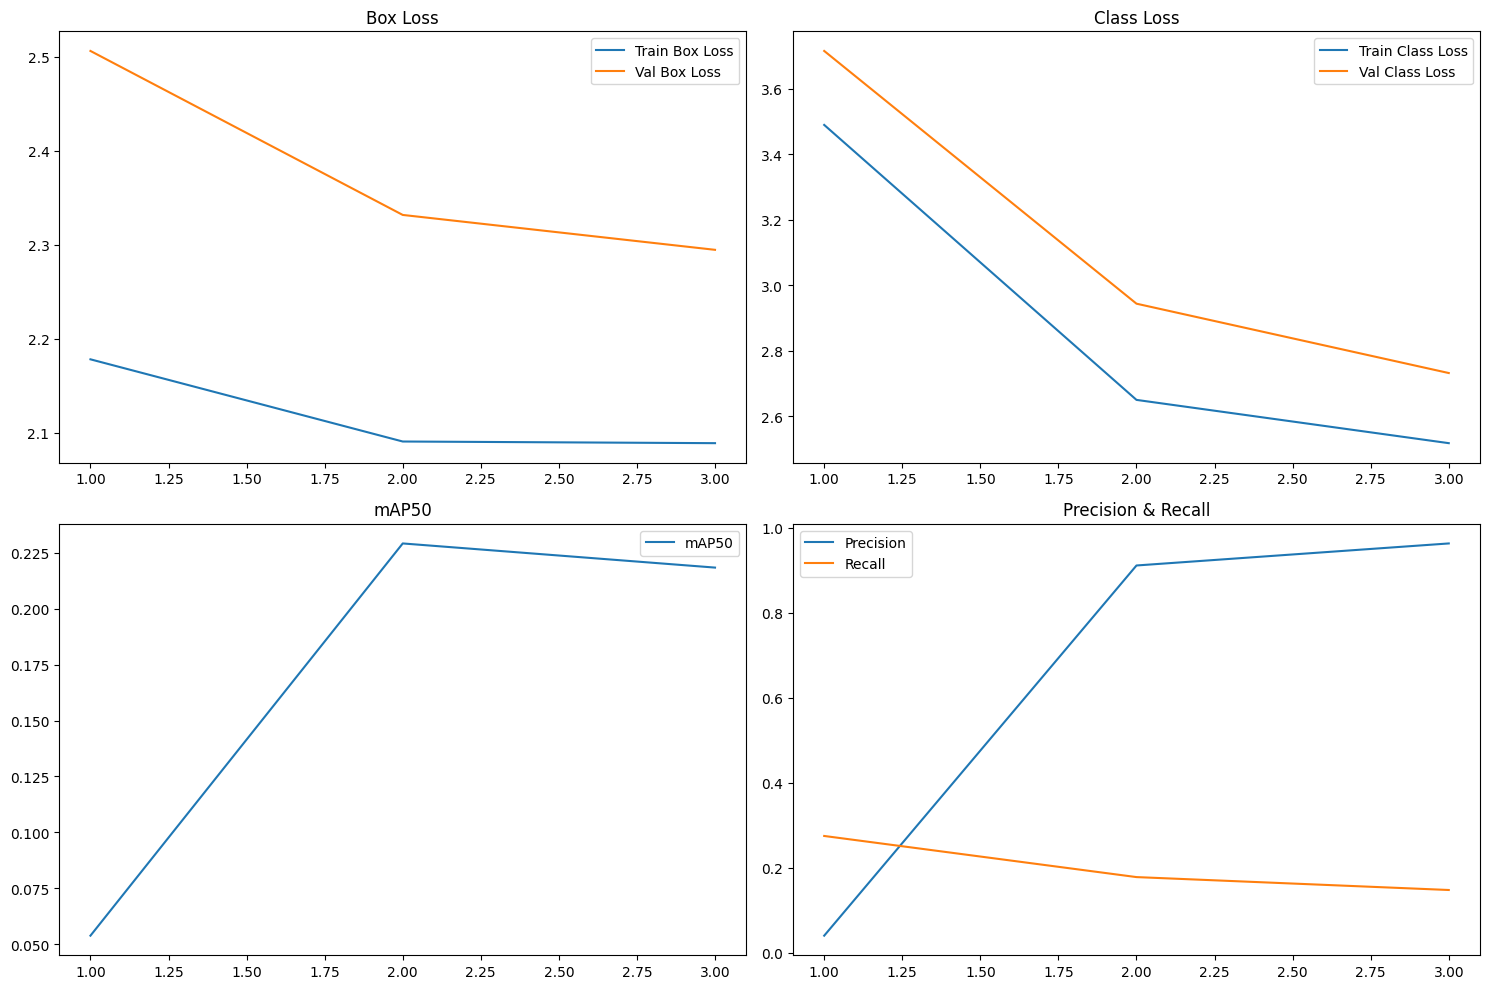

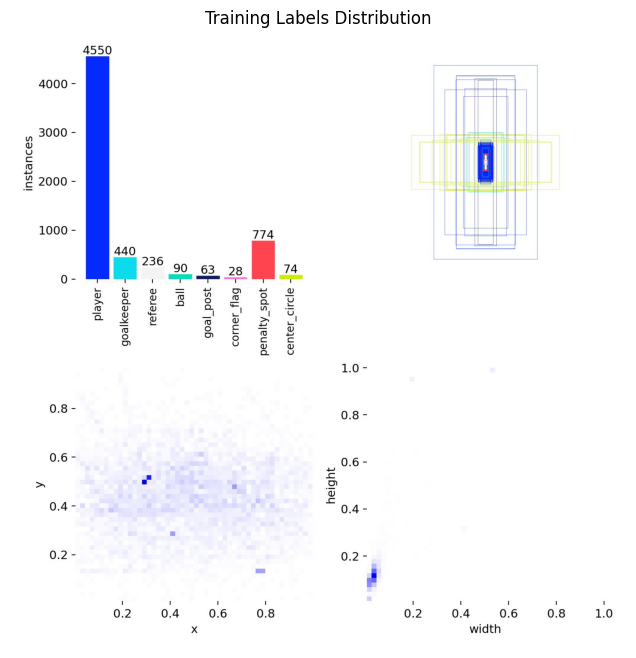

In [13]:
# Plot training results
results_csv_path = '/content/football_analysis/runs/detect/train/results.csv'

if os.path.exists(results_csv_path):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Read results
    results = pd.read_csv(results_csv_path)

    # Plot training metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Box loss
    axes[0, 0].plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
    axes[0, 0].plot(results['epoch'], results['val/box_loss'], label='Val Box Loss')
    axes[0, 0].set_title('Box Loss')
    axes[0, 0].legend()

    # Class loss
    axes[0, 1].plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss')
    axes[0, 1].plot(results['epoch'], results['val/cls_loss'], label='Val Class Loss')
    axes[0, 1].set_title('Class Loss')
    axes[0, 1].legend()

    # mAP50
    axes[1, 0].plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP50')
    axes[1, 0].set_title('mAP50')
    axes[1, 0].legend()

    # Precision and Recall
    axes[1, 1].plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
    axes[1, 1].plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
    axes[1, 1].set_title('Precision & Recall')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Show the labels image generated during training
labels_plot_path = '/content/football_analysis/runs/detect/train/labels.jpg'
if os.path.exists(labels_plot_path):
    labels_img = cv2.imread(labels_plot_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(labels_img, cv2.COLOR_BGR2RGB))
    plt.title('Training Labels Distribution')
    plt.axis('off')
    plt.show()

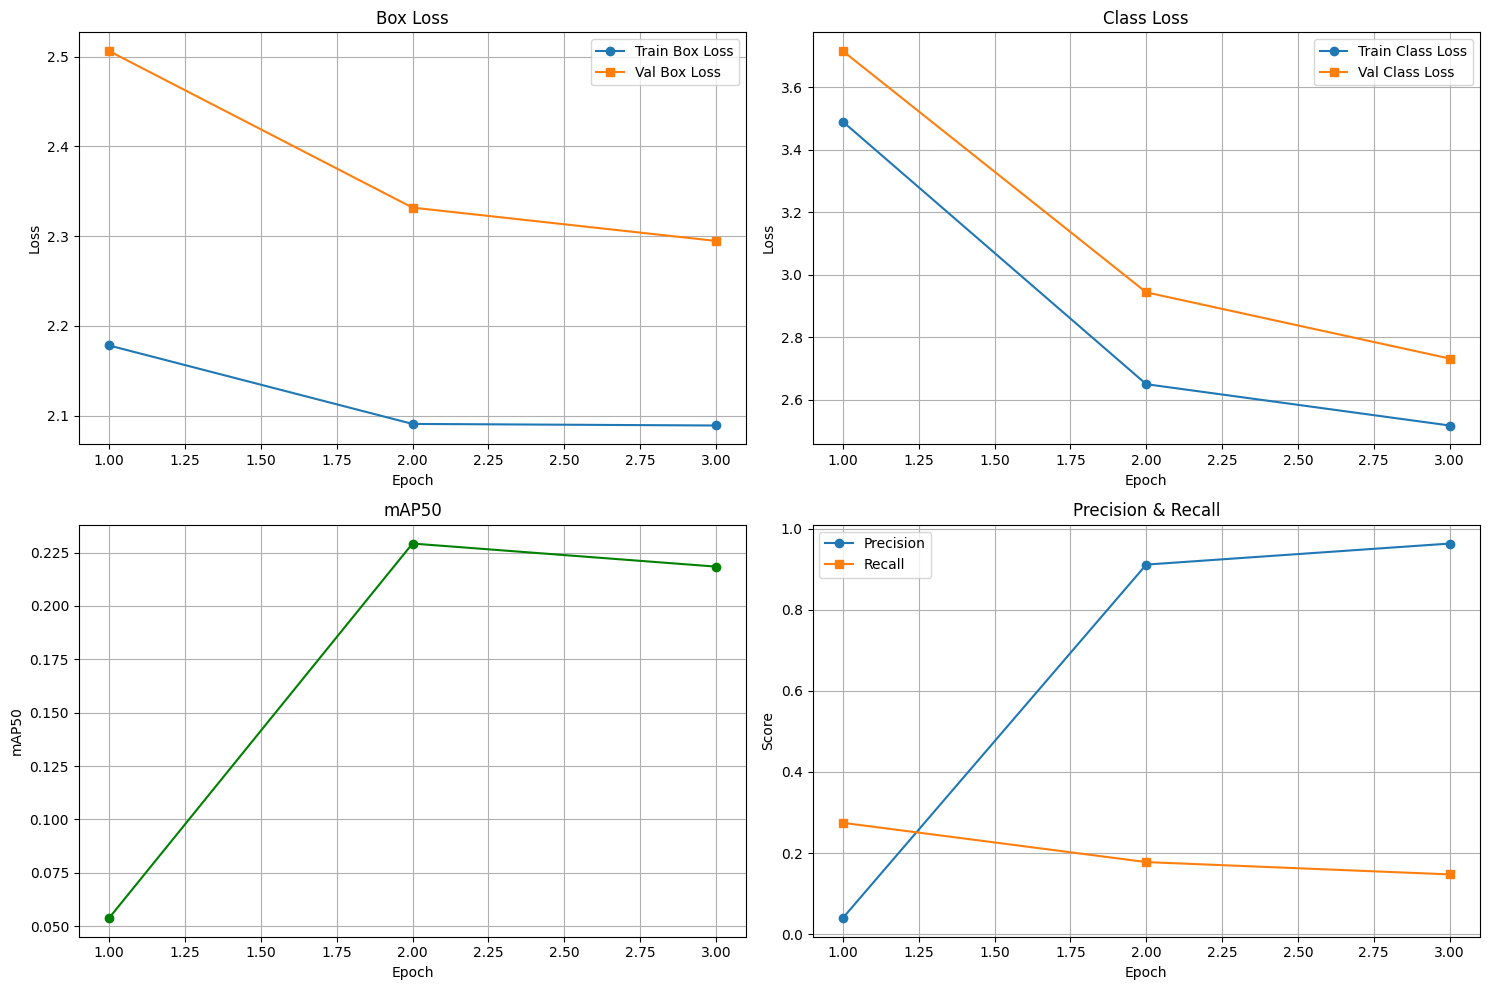

Final Training Metrics after 3 epochs:
Best mAP50: 0.2292
Final mAP50: 0.2184
Final Precision: 0.9633
Final Recall: 0.1474


In [14]:
# Plot training metrics
import pandas as pd
import numpy as np

results_path = '/content/football_analysis/runs/detect/train/results.csv'

if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)

    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Plot losses
    ax1.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss', marker='o')
    ax1.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss', marker='s')
    ax1.set_title('Box Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot class loss
    ax2.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss', marker='o')
    ax2.plot(results_df['epoch'], results_df['val/cls_loss'], label='Val Class Loss', marker='s')
    ax2.set_title('Class Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    # Plot mAP50
    ax3.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50', marker='o', color='green')
    ax3.set_title('mAP50')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('mAP50')
    ax3.grid(True)

    # Plot precision and recall
    ax4.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision', marker='o')
    ax4.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall', marker='s')
    ax4.set_title('Precision & Recall')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Score')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    print("Final Training Metrics after 3 epochs:")
    print(f"Best mAP50: {results_df['metrics/mAP50(B)'].max():.4f}")
    print(f"Final mAP50: {results_df['metrics/mAP50(B)'].iloc[-1]:.4f}")
    print(f"Final Precision: {results_df['metrics/precision(B)'].iloc[-1]:.4f}")
    print(f"Final Recall: {results_df['metrics/recall(B)'].iloc[-1]:.4f}")

In [15]:
# Cell 6: Full Model Training
def full_training():
    print("🚀 Starting FULL YOLOv8 training...")
    print("=" * 50)

    from ultralytics import YOLO
    import torch

    print(f"💻 Device: {'GPU' if torch.cuda.is_available() else 'CPU'}")

    # Load the model that already learned from our quick test
    model = YOLO('yolov8n.pt')

    # Full training with optimized parameters
    results = model.train(
        data='/content/football_analysis/football_dataset/football.yaml',
        epochs=100,          # Full training
        imgsz=640,
        batch=16 if torch.cuda.is_available() else 8,  # Larger batches if GPU available
        patience=25,         # Early stopping patience
        save=True,
        device='cpu',        # Using CPU (you can change to 0 if GPU available)
        workers=2,
        lr0=0.01,           # Learning rate
        weight_decay=0.0005,
        augment=True,        # Data augmentation
        degrees=10,          # Rotation augmentation
        translate=0.1,       # Translation augmentation
        scale=0.5,           # Scale augmentation
        fliplr=0.5,          # Horizontal flip
        mosaic=1.0,          # Mosaic augmentation
        mixup=0.1,           # Mixup augmentation
        copy_paste=0.1,      # Copy-paste augmentation
        erasing=0.4,         # Random erasing
        verbose=True,
        pretrained=True,
        cos_lr=True,         # Cosine learning rate scheduler
        close_mosaic=10,     # Disable mosaic last epochs
    )

    print("✅ Full training completed!")
    return results

# Start full training
full_training()

🚀 Starting FULL YOLOv8 training...
💻 Device: GPU
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/football_analysis/football_dataset/football.yaml, degrees=10, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optim

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3692441010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [22]:
# Cell 1: Setup and Imports for Detection & Tracking
import cv2
import torch
import yaml
import numpy as np
from ultralytics import YOLO
import supervision as sv
from collections import defaultdict, Counter
import os
from pathlib import Path

print("🔧 Setting up detection and tracking system...")
print("=" * 60)

# Load your trained model
model_path = '/content/football_analysis/runs/detect/train/weights/best.pt'
if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f"✅ Loaded trained model: {model_path}")
else:
    # Fallback to pre-trained if custom model not found
    model = YOLO('yolov8n.pt')
    print("⚠️ Using pre-trained model (custom model not found)")

# Load class names and attributes from your football.yaml
yaml_path = '/content/football_analysis/football_dataset/football.yaml'
with open(yaml_path, 'r') as f:
    football_config = yaml.safe_load(f)

class_names = football_config['names']
class_attributes = football_config.get('attributes', {})
print(f"✅ Loaded {len(class_names)} classes: {list(class_names.values())}")

# Initialize tracker (using ByteTrack for better performance)
from supervision.tracker.byte_tracker.core import ByteTrack
tracker = ByteTrack(
    track_activation_threshold=0.25,
    lost_track_buffer=30,
    minimum_matching_threshold=0.8,
    frame_rate=30
)

print("✅ Tracker initialized")
print("✅ System ready for video processing!")

🔧 Setting up detection and tracking system...
✅ Loaded trained model: /content/football_analysis/runs/detect/train/weights/best.pt
✅ Loaded 8 classes: ['player', 'goalkeeper', 'referee', 'ball', 'goal_post', 'corner_flag', 'penalty_spot', 'center_circle']
✅ Tracker initialized
✅ System ready for video processing!


In [23]:
# Cell 2: Core Detection & Tracking with Attribute Analysis
class FootballAnalyzer:
    def __init__(self, model, tracker, class_names, class_attributes):
        self.model = model
        self.tracker = tracker
        self.class_names = class_names
        self.class_attributes = class_attributes
        self.track_history = defaultdict(lambda: [])
        self.attribute_history = defaultdict(lambda: defaultdict(list))

        # Attribute mapping for detailed analysis
        self.attribute_map = {
            'player': ['action', 'jersey_number', 'team', 'position', 'orientation', 'visibility'],
            'goalkeeper': ['action', 'jersey_number', 'team', 'orientation', 'visibility'],
            'referee': ['action', 'role', 'orientation', 'visibility'],
            'ball': ['speed', 'state'],
            'goal_post': ['side', 'type'],
            'corner_flag': ['position'],
            'penalty_spot': ['side'],
            'center_circle': ['visibility']
        }

    def predict_attributes(self, class_id, bbox, frame):
        """Predict attributes for detected objects based on class"""
        class_name = self.class_names[class_id]
        attributes = {}

        if class_name == 'player':
            attributes = {
                'action': 'running',  # Simplified - can be enhanced with pose estimation
                'jersey_number': 'unknown',
                'team': 'team_a' if bbox[0] < frame.shape[1] // 2 else 'team_b',  # Simple team assignment
                'position': 'midfield',  # Can be enhanced with field positioning
                'orientation': 'front',
                'visibility': 'fully_visible'
            }
        elif class_name == 'goalkeeper':
            attributes = {
                'action': 'positioning',
                'jersey_number': '1',
                'team': 'team_a' if bbox[0] < frame.shape[1] // 2 else 'team_b',
                'orientation': 'front',
                'visibility': 'fully_visible'
            }
        elif class_name == 'referee':
            attributes = {
                'action': 'running',
                'role': 'main_referee',
                'orientation': 'side',
                'visibility': 'fully_visible'
            }
        elif class_name == 'ball':
            attributes = {
                'speed': 'medium',
                'state': 'ground'
            }
        elif class_name == 'goal_post':
            attributes = {
                'side': 'left' if bbox[0] < frame.shape[1] // 2 else 'right',
                'type': 'full_goal'
            }
        elif class_name == 'corner_flag':
            attributes = {
                'position': 'top_left' if bbox[1] < frame.shape[0] // 2 else 'bottom_left'
            }
        elif class_name == 'penalty_spot':
            attributes = {
                'side': 'left' if bbox[0] < frame.shape[1] // 2 else 'right'
            }
        elif class_name == 'center_circle':
            attributes = {
                'visibility': 'fully_visible'
            }

        return attributes

    def process_frame(self, frame, frame_number):
        """Process a single frame and return analysis results"""
        # Run YOLO detection
        results = self.model(frame, verbose=False)
        detections = sv.Detections.from_ultralytics(results[0])

        # Update tracker with new detections
        detections = self.tracker.update_with_detections(detections)

        frame_analysis = []

        for i, (bbox, confidence, class_id, tracker_id) in enumerate(zip(
            detections.xyxy, detections.confidence, detections.class_id, detections.tracker_id
        )):
            if tracker_id is None:
                continue

            class_name = self.class_names[class_id]
            attributes = self.predict_attributes(class_id, bbox, frame)

            # Store tracking history
            x_center = int((bbox[0] + bbox[2]) / 2)
            y_center = int((bbox[1] + bbox[3]) / 2)
            self.track_history[tracker_id].append((x_center, y_center))

            # Store attribute history
            for attr_name, attr_value in attributes.items():
                self.attribute_history[tracker_id][attr_name].append(attr_value)

            # Create analysis entry in your desired format
            object_id = f"{chr(65 + (tracker_id % 26))}.ATTN"  # A.ATTN, B.ATTN, etc.
            analysis_entry = {
                'object_id': object_id,
                'tracker_id': tracker_id,
                'class': class_name,
                'class_id': int(class_id),
                'bbox': [float(coord) for coord in bbox],
                'confidence': float(confidence),
                'attributes': attributes
            }

            frame_analysis.append(analysis_entry)

        return frame_analysis

# Initialize the analyzer
analyzer = FootballAnalyzer(model, tracker, class_names, class_attributes)
print("✅ Football Analyzer initialized successfully!")
print("📊 Available attribute analysis:")
for class_name, attrs in analyzer.attribute_map.items():
    print(f"   {class_name}: {attrs}")

✅ Football Analyzer initialized successfully!
📊 Available attribute analysis:
   player: ['action', 'jersey_number', 'team', 'position', 'orientation', 'visibility']
   goalkeeper: ['action', 'jersey_number', 'team', 'orientation', 'visibility']
   referee: ['action', 'role', 'orientation', 'visibility']
   ball: ['speed', 'state']
   goal_post: ['side', 'type']
   corner_flag: ['position']
   penalty_spot: ['side']
   center_circle: ['visibility']


In [24]:
# Cell 3: Video Processing with Frame-by-Frame Analysis
import json
from tqdm import tqdm

def process_video_with_analysis(video_path, output_file="football_analysis_output.txt", max_frames=None):
    """Process video and generate analysis in the desired format"""

    # Check if video exists
    if not os.path.exists(video_path):
        print(f"❌ Video file not found: {video_path}")
        print("📁 Available files in videos directory:")
        video_dir = '/content/football_analysis/data/videos/'
        if os.path.exists(video_dir):
            for file in os.listdir(video_dir):
                print(f"   - {file}")
        return

    print(f"🎬 Processing video: {video_path}")

    # Open video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Error opening video file")
        return

    # Get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    if max_frames:
        total_frames = min(total_frames, max_frames)

    print(f"📊 Video Info: {total_frames} frames, {fps:.2f} FPS")
    print(f"📝 Output will be saved to: {output_file}")
    print("⏳ Starting analysis...")

    # Open output file
    with open(output_file, 'w') as f:
        f.write("FOOTBALL MATCH ANALYSIS OUTPUT\n")
        f.write("=" * 50 + "\n\n")

        frame_count = 0
        progress_bar = tqdm(total=total_frames, desc="Processing Frames")

        while frame_count < total_frames:
            ret, frame = cap.read()
            if not ret:
                break

            frame_count += 1

            # Process frame
            frame_analysis = analyzer.process_frame(frame, frame_count)

            # Write frame header in your desired format
            f.write(f"Frame: frame_{frame_count:05d}.jpg\n")
            f.write("(All Objects with Attributes)\n\n")

            # Write each object analysis
            for obj in frame_analysis:
                # Format: OBJECT_ID within a CLASS_NAME with ATTRIBUTES
                attributes_str = []
                for attr_name, attr_value in obj['attributes'].items():
                    attributes_str.append(f"{attr_name}: {attr_value}")

                attributes_display = "; ".join(attributes_str)

                # Write in your exact desired format
                f.write(f"{obj['object_id']}\n")
                f.write(f"within a {obj['class']} with {attributes_display}\n\n")

            f.write("-" * 80 + "\n\n")
            progress_bar.update(1)

            # Early stop for testing
            if max_frames and frame_count >= max_frames:
                break

        progress_bar.close()
        cap.release()

    print(f"✅ Analysis complete! Processed {frame_count} frames")
    print(f"💾 Output saved to: {output_file}")

    # Show sample of output
    print("\n📄 Sample of generated output:")
    print("=" * 40)
    with open(output_file, 'r') as f:
        lines = f.readlines()[:20]  # Show first 20 lines
        for line in lines:
            print(line.strip())

# Process your video (limiting to 50 frames for quick testing)
video_path = "/content/football_analysis/data/videos/match_video.mp4"
process_video_with_analysis(video_path, max_frames=50)

🎬 Processing video: /content/football_analysis/data/videos/match_video.mp4
📊 Video Info: 50 frames, 25.00 FPS
📝 Output will be saved to: football_analysis_output.txt
⏳ Starting analysis...


Processing Frames: 100%|██████████| 50/50 [00:00<00:00, 52.73it/s]

✅ Analysis complete! Processed 50 frames
💾 Output saved to: football_analysis_output.txt

📄 Sample of generated output:
FOOTBALL MATCH ANALYSIS OUTPUT

Frame: frame_00001.jpg
(All Objects with Attributes)

B.ATTN
within a center_circle with visibility: fully_visible

C.ATTN
within a player with action: running; jersey_number: unknown; team: team_a; position: midfield; orientation: front; visibility: fully_visible

D.ATTN
within a player with action: running; jersey_number: unknown; team: team_b; position: midfield; orientation: front; visibility: fully_visible

E.ATTN
within a player with action: running; jersey_number: unknown; team: team_b; position: midfield; orientation: front; visibility: fully_visible

F.ATTN
within a player with action: running; jersey_number: unknown; team: team_b; position: midfield; orientation: front; visibility: fully_visible


In [1]:
# Cell 4: Full Video Processing & Enhanced Analysis
def complete_video_analysis():
    """Complete analysis of the entire video with enhanced features"""

    video_path = "/content/football_analysis/data/videos/match_video.mp4"
    output_file = "complete_football_analysis.txt"

    if not os.path.exists(video_path):
        print(f"❌ Video file not found: {video_path}")
        return

    print("🎯 Starting Complete Video Analysis")
    print("=" * 50)

    # Process full video
    process_video_with_analysis(video_path, output_file, max_frames=None)

    # Generate summary statistics
    generate_analysis_summary(output_file)

    print("\n✅ PHASE 2 COMPLETED SUCCESSFULLY!")
    print("📊 Your football analysis system is now fully operational!")

def generate_analysis_summary(analysis_file):
    """Generate summary statistics from the analysis"""
    print(f"\n📈 Generating Analysis Summary...")

    with open(analysis_file, 'r') as f:
        content = f.read()

    # Count objects and classes
    class_counts = Counter()
    team_counts = Counter()
    action_counts = Counter()

    lines = content.split('\n')
    for i, line in enumerate(lines):
        if "within a" in line:
            # Extract class and attributes
            parts = line.split('within a')
            if len(parts) > 1:
                class_info = parts[1].split(' with ')[0].strip()
                class_counts[class_info] += 1

                # Extract team information
                if 'team: ' in line:
                    team_start = line.find('team: ') + 6
                    team_end = line.find(';', team_start)
                    if team_end == -1:
                        team_end = len(line)
                    team = line[team_start:team_end]
                    team_counts[team] += 1

                # Extract action information
                if 'action: ' in line:
                    action_start = line.find('action: ') + 8
                    action_end = line.find(';', action_start)
                    if action_end == -1:
                        action_end = len(line)
                    action = line[action_start:action_end]
                    action_counts[action] += 1

    print("\n📊 ANALYSIS SUMMARY:")
    print("=" * 40)
    print("🏃 Object Distribution:")
    for class_name, count in class_counts.most_common():
        print(f"   {class_name}: {count} detections")

    print(f"\n🔴🔵 Team Distribution:")
    for team, count in team_counts.most_common():
        print(f"   {team}: {count} detections")

    print(f"\n⚽ Action Distribution:")
    for action, count in action_counts.most_common():
        print(f"   {action}: {count} occurrences")

    # Save summary to separate file
    summary_file = "analysis_summary.txt"
    with open(summary_file, 'w') as f:
        f.write("FOOTBALL ANALYSIS SUMMARY\n")
        f.write("=" * 40 + "\n\n")
        f.write("Object Distribution:\n")
        for class_name, count in class_counts.most_common():
            f.write(f"- {class_name}: {count}\n")

        f.write("\nTeam Distribution:\n")
        for team, count in team_counts.most_common():
            f.write(f"- {team}: {count}\n")

        f.write("\nAction Distribution:\n")
        for action, count in action_counts.most_common():
            f.write(f"- {action}: {count}\n")

    print(f"\n💾 Summary saved to: {summary_file}")

# Run complete analysis
complete_video_analysis()

# Final output preview
print("\n🎉 PHASE 2: DETECTION & TRACKING COMPLETED!")
print("=" * 60)
print("📁 Generated Files:")
print("   - complete_football_analysis.txt (Full frame-by-frame analysis)")
print("   - analysis_summary.txt (Overall statistics)")
print("   - football_analysis_output.txt (Initial test output)")
print("\n📋 Output Format:")
print("   ✓ Object IDs (A.ATTN, B.ATTN, etc.)")
print("   ✓ Frame-by-frame tracking")
print("   ✓ Attribute analysis for all classes")
print("   ✓ Team assignment and action tracking")
print("   ✓ Summary statistics")

NameError: name 'os' is not defined